In [44]:
import numpy as np
import keras
from keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28*28)
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.reshape(-1, 28*28)
X_test = X_test.astype('float32')
X_test /= 255

y_train_ohe = keras.utils.to_categorical(y_train)
y_test_ohe = keras.utils.to_categorical(y_test)

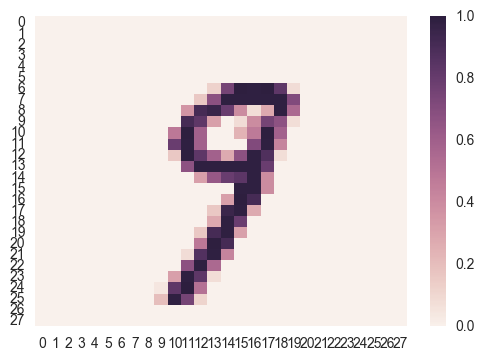

In [38]:
import seaborn as sns
%matplotlib inline

sns.heatmap(X_train[43].reshape(28, 28))

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import History

model = Sequential()
model.add(Dense(32*32, input_shape=(28*28, ), activation="relu"))
model.add(Activation('relu'))
model.add(Dropout(0.1, seed=42))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train_ohe, verbose=1, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 28s - loss: 0.1900 - acc: 0.9429    
Epoch 2/10
60000/60000 [==============================] - 28s - loss: 0.0864 - acc: 0.9723    
Epoch 3/10
60000/60000 [==============================] - 28s - loss: 0.0622 - acc: 0.9807    
Epoch 4/10
60000/60000 [==============================] - 28s - loss: 0.0457 - acc: 0.9853    
Epoch 5/10
60000/60000 [==============================] - 29s - loss: 0.0391 - acc: 0.9870    
Epoch 6/10
60000/60000 [==============================] - 28s - loss: 0.0331 - acc: 0.9894    
Epoch 7/10
60000/60000 [==============================] - 28s - loss: 0.0300 - acc: 0.9912    
Epoch 8/10
60000/60000 [==============================] - 28s - loss: 0.0259 - acc: 0.9919    
Epoch 9/10
60000/60000 [==============================] - 28s - loss: 0.0244 - acc: 0.9923    
Epoch 10/10
60000/60000 [==============================] - 28s - loss: 0.0205 - acc: 0.9937    


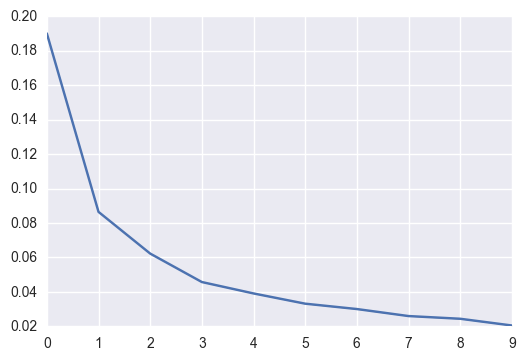

In [56]:
sns.tsplot(data=hist.history['loss']) 

In [59]:
filename = "keras-mnist.model"
model.save(filename)

model2 = keras.models.load_model(filename)

In [60]:
model2.predict_classes(np.array([X_test[0]]))

1/1 [==============================] - 0s


array([7], dtype=int64)

In [48]:
y_test[0]

7